# Implementación de un pipeline completo usando un conjunto de datos sencillo (digits).

En un principio es clave importar las librerías con las que se trabajará.
- NumPy para operaciones matemáticas y manipulación de arreglos
- Matplotlib para crear gráficos y visualizaciones
- Scikit-learn por el dateset empleado y algunas funciones específicas para la implementación del ML

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Dataset Digits
Este dataset se compone por imágenes de dígitos del 0 al 9 que permiten entrenar modelos para la identificación de dichos números.
Primero cargamos el dataset sklearn y dividimos entre características y etiquetas. Se trata de aprendizaje supervisado.

In [10]:
# Cargar el dataset de dígitos
digits = datasets.load_digits()
X = digits.data  # Características (imágenes)
y = digits.target  # Etiquetas (dígitos)

## Cojuntos de entrenamiento y prueba
Se asigna una porción pequeña,  suele ser entre un 30% o un 20% de la muestra para la prueba una vez se entrene el modelo con la otra parte. El random_state=42 asegura que la división sea reproducible.

In [11]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocesar los Datos
Se instancia el StandartScaler para normalizar los datos. Ajustando el escalador de cada conjunto de característica. Se calcula la media y la desviación estándar.

In [12]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Entrenamiento y predicción
Se crea una instancia del modelo de Regresión Logística con un número máximo de iteraciones de 10000, para asegurar convergencia. Luego se entrena con el conjunto de entrenamiento y el modelo aprende a predecir etiquetas a partir de características.
Se hacen las predicciones sobre el conjunto de prueba y se almacena el resultado.

In [13]:
# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

## Evaluación y Visualización de resultados
La matriz de confusión dada por las etiquetas verdaderas las de predicción realizadas. Se muestran cuántas predicciones fueron realizads. Luego se muestra un reporte con datos de precisión, recall(sensibilidad) y F1-score de cada clase.

In [15]:
# Evaluar el modelo con una matriz de confusión y un informe de clasificación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       

## Visualización
Crea una figura de 10x5 y se itera sobre los diez primero del conjunto de prueba. Crea una subgráfica en una cuadrícula de 2x5. Muestra la imagen correspondiente reformateada a su forma original en escala de grises. Se establece un título, se ocultan los ejes, y se ajusta de forma automática los parámetros del subgráfico en el área. Por último se muestran los gráficos.

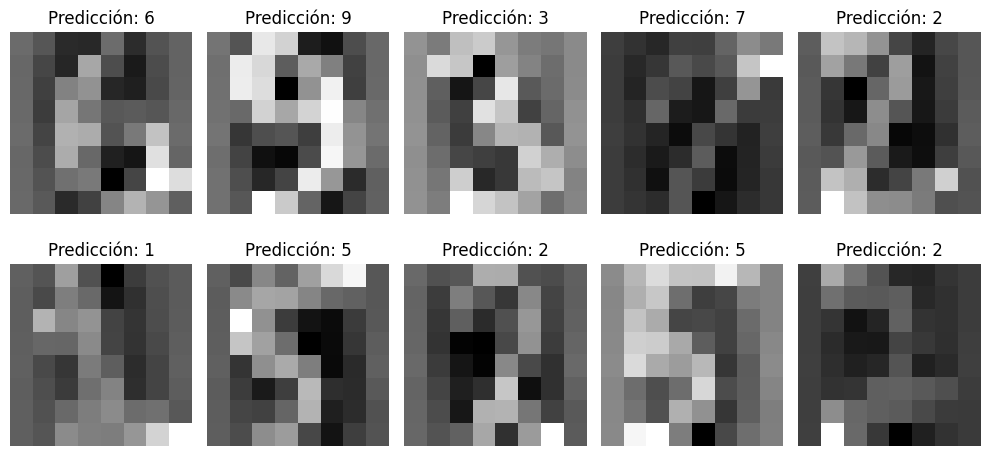

In [16]:
# Visualizar algunas predicciones
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Predicción: {y_pred[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()